# Bulk Image Enhancer

**Authors:** Berenguer, Beatrice A. and Pinpin, Christopher Mari P. <br>
**Section:** STDISCM - S13

In this project, we made a bulk image enhancer which will enhance all images from a source folder and will produce the enhanced photo to a destination folder. Stock photos will be used to populate the source folder and a folder named "enhanced" will be created to contain the enhanced photos.

In this section, `threading` will be imported to set the sempahore lock. We will set the `BoundedSemaphore` to a value of 5, so the program will only process 5 threads at a time. <br><br>

To enhance the image, `Image` and `ImageEnhance` from `PIL` will be used to modify the contrast, brightness, and sharpness of the image.

In [1]:
from PIL import Image, ImageEnhance
import threading

semaphore = threading.BoundedSemaphore(value=5)
path = 'images/'
save_path = 'enhanced/'
file_path = 'image_stats.txt'

def enhance_img(filename, c, b, s, threading):
    x = filename.split('.')
    
    if x[1] != "gif":
        print(filename + " is trying to access!")
        semaphore.acquire()

        print(filename + " granted access!")
        img = Image.open(path + filename)
        img_c = ImageEnhance.Contrast(img).enhance(c)
        img_b = ImageEnhance.Brightness(img_c).enhance(b)
        img_s = ImageEnhance.Sharpness(img_b).enhance(s)
        img_s.save(save_path + str(filename))
        file = open(file_path, 'a')
        file.write(save_path + filename + '\n')
        file.close()

        print(filename + " is now releasing!")
        semaphore.release()
    else:
        print(filename + " is trying to access!")
        semaphore.acquire()
        
        gif = []

        print(filename + " granted access!")
        img = Image.open(path + filename)
        for frame_num in range(img.n_frames):
            img.seek(frame_num)
            frame = Image.new('RGB', img.size)
            frame.paste(img)
            frame = frame.convert(mode='RGB')
            img_c = ImageEnhance.Contrast(frame).enhance(c)
            img_b = ImageEnhance.Brightness(img_c).enhance(b)
            img_s = ImageEnhance.Sharpness(img_b).enhance(s)
            gif.append(img_s)

        gif[0].save(save_path + filename, append_images=gif[1:], save_all=True, loop = 0, duration = 1)
        
        if threading:
            file = open(file_path, 'a')
            file.write(save_path + filename + '\n')
            file.close()
        print(filename + " is now releasing!")
        semaphore.release()

To modify the contrast, brightness, and sharpness, enter the enhancement factor for each. **Do note that an enhancement factor of 1 will return the original image without any enhancement.**

In [2]:
from os import listdir
import cv2
from matplotlib import pyplot as plt
import time


c = float(input('Contrast enhancement factor: '))
b = float(input('Brightness enhancement factor: '))
s = float(input('Sharpness enhancement factor: '))

file = open(file_path, 'w')
file.write('Contrast enhancement factor: ' + str(c) + '\n')
file.write('Brightness enhancement factor: ' + str(b) + '\n')
file.write('Sharpness enhancement factor: ' + str(s) + '\n')
file.close()

start = time.time()
for img in listdir(path):
    enhance_img(img, c, b, s, False)
    
    
duration = time.time() - start

Contrast enhancement factor: 1.3
Brightness enhancement factor: 0.8
Sharpness enhancement factor: 1.9
abird.jpg is trying to access!
abird.jpg granted access!
abird.jpg is now releasing!
acar.jpg is trying to access!
acar.jpg granted access!
acar.jpg is now releasing!
acat.jpg is trying to access!
acat.jpg granted access!
acat.jpg is now releasing!
adog.jpg is trying to access!
adog.jpg granted access!
adog.jpg is now releasing!
aplane.jpg is trying to access!
aplane.jpg granted access!
aplane.jpg is now releasing!
bird - Copy (10).jpg is trying to access!
bird - Copy (10).jpg granted access!
bird - Copy (10).jpg is now releasing!
bird - Copy (11).jpg is trying to access!
bird - Copy (11).jpg granted access!
bird - Copy (11).jpg is now releasing!
bird - Copy (12).jpg is trying to access!
bird - Copy (12).jpg granted access!
bird - Copy (12).jpg is now releasing!
bird - Copy (13).jpg is trying to access!
bird - Copy (13).jpg granted access!
bird - Copy (13).jpg is now releasing!
bird - 

In [3]:
print("Elapsed time: ", duration)

Elapsed time:  8.96493124961853


The program was executed without the implementation of multithreading yet. With this, we can see that it enhanced each photo one by one. <br><br>

Let's see the difference between the original image and the enhanced image.

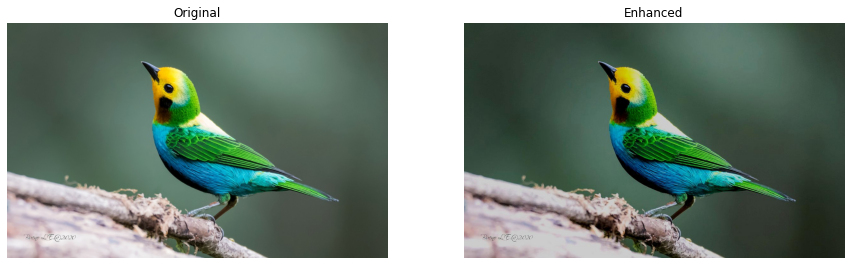

In [4]:
path = 'images/'
save_path = 'enhanced/'

fig = plt.figure(figsize=(15, 20))

i = 1
columns = 2
rows = 1

for img in listdir(path):
    img_normal = cv2.imread(path + img)
    img_enhanced = cv2.imread(save_path + img)
    img_normal = cv2.cvtColor(img_normal, cv2.COLOR_BGR2RGB)
    img_enhanced = cv2.cvtColor(img_enhanced, cv2.COLOR_BGR2RGB)
    
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_normal)
    plt.axis('off')
    plt.title('Original')
    i += 1
    
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_enhanced)
    plt.axis('off')
    plt.title('Enhanced')
    i += 1
    if i == 3:
        break
    
plt.show()

We can see that the photo is clearly enhanced on the right. With this, let's implement multithreading and see how each thread tries to access, gets granted access, and release the semaphore when enhancing a photo. <br><br>

Let us also set a time limit in case the program runs for too long.

In [5]:
import threading

path = 'images/'
save_path = 'enhanced/'

end_time = int(input('Enter time duration (in minutes): '))
end_time *= 60

threads = []

thread_ctr = 0
start_time = time.time()

for img in listdir(path):
    t = threading.Thread(target=enhance_img, args=(img, c, b, s, True,))
    t.start()
    thread_ctr += 1
    threads.append(t)
    
    if end_time < time.time() - start_time:
        break
        
for x in threads:
    x.join()
    
    if end_time <= time.time() - start_time:
        break
        
total_duration = time.time() - start_time

Enter time duration (in minutes): 1
abird.jpg is trying to access!
abird.jpg granted access!
acar.jpg is trying to access!
acat.jpg is trying to access!acar.jpg granted access!

acat.jpg granted access!
adog.jpg is trying to access!aplane.jpg is trying to access!
aplane.jpg granted access!

adog.jpg granted access!
bird - Copy (10).jpg is trying to access!
acar.jpg is now releasing!
bird - Copy (10).jpg granted access!
aplane.jpg is now releasing!
bird - Copy (11).jpg is trying to access!
bird - Copy (11).jpg granted access!
bird - Copy (12).jpg is trying to access!
adog.jpg is now releasing!
bird - Copy (12).jpg granted access!
bird - Copy (13).jpg is trying to access!
bird - Copy (2).jpg is trying to access!
abird.jpg is now releasing!bird - Copy (3).jpg is trying to access!

bird - Copy (13).jpg granted access!
bird - Copy (10).jpg is now releasing!
bird - Copy (2).jpg granted access!
bird - Copy (4).jpg is trying to access!
bird - Copy (11).jpg is now releasing!
bird - Copy (4).jpg

In [6]:
print("Total elapsed time: ", total_duration)
print("Total images enhanced: ", thread_ctr)

file = open(file_path, 'a')
file.write("Total elapsed time: " + str(total_duration) + '\n')
file.write("Total images enhanced: " + str(thread_ctr) + '\n')
file.close()

Total elapsed time:  4.37577486038208
Total images enhanced:  73


The total elapsed time drastically improved when multithreading and semaphore is implemented. By having a `BoundedSemaphore` with a value of 5, it allowed threads to execute simultaneously and decrease the time completion to enhance all photos.

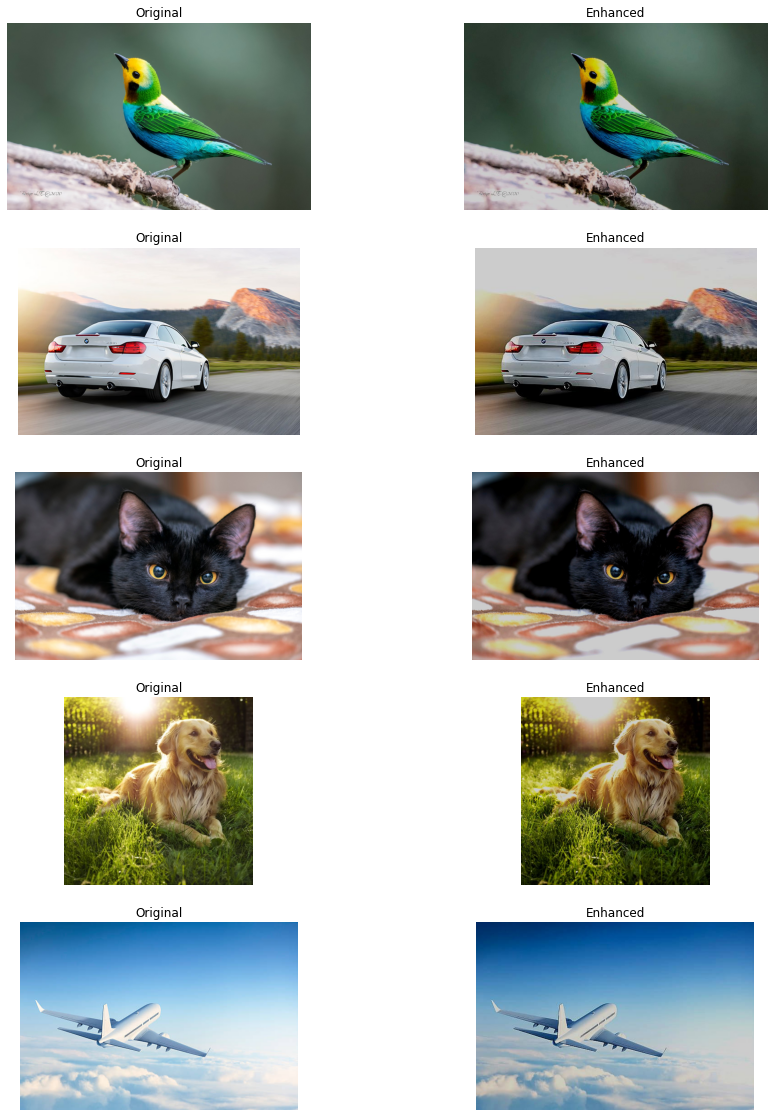

In [7]:
path = 'images/'
save_path = 'enhanced/'

fig = plt.figure(figsize=(15, 20))

i = 1
columns = 2
rows = 5

for img in listdir(path):
    img_normal = cv2.imread(path + img)
    img_enhanced = cv2.imread(save_path + img)
    img_normal = cv2.cvtColor(img_normal, cv2.COLOR_BGR2RGB)
    img_enhanced = cv2.cvtColor(img_enhanced, cv2.COLOR_BGR2RGB)
    
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_normal)
    plt.axis('off')
    plt.title('Original')
    i += 1
    
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_enhanced)
    plt.axis('off')
    plt.title('Enhanced')
    i += 1
    if i == 11:
        break
    
plt.show()